# <div style="background-color:#333;color:#fff;border-radius:20px;padding:15px;text-align:center;margin:0"> DCA | volve data</div>

In [16]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [17]:
# load the data 
df = pd.read_excel("../data/Volve production data.xlsx")

In [18]:
df.head() 

,DATEPRD,WELL_BORE_CODE,NPD_WELL_BORE_CODE,NPD_WELL_BORE_NAME,NPD_FIELD_CODE,NPD_FIELD_NAME,NPD_FACILITY_CODE,NPD_FACILITY_NAME,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,...,AVG_CHOKE_UOM,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL,BORE_WI_VOL,FLOW_KIND,WELL_TYPE
0,2014-04-07,NO 15/9-F-1 C,7405,15/9-F-1 C,3420717,VOLVE,369304,MÆRSK INSPIRER,0.0,0.00000,...,%,0.00000,0.00000,0.00000,0.0,0.0,0.0,NaN,production,WI
1,2014-04-08,NO 15/9-F-1 C,7405,15/9-F-1 C,3420717,VOLVE,369304,MÆRSK INSPIRER,0.0,NaN,...,%,0.00000,0.00000,0.00000,0.0,0.0,0.0,NaN,production,OP
2,2014-04-09,NO 15/9-F-1 C,7405,15/9-F-1 C,3420717,VOLVE,369304,MÆRSK INSPIRER,0.0,NaN,...,%,0.00000,0.00000,0.00000,0.0,0.0,0.0,NaN,production,OP
3,2014-04-10,NO 15/9-F-1 C,7405,15/9-F-1 C,3420717,VOLVE,369304,MÆRSK INSPIRER,0.0,NaN,...,%,0.00000,0.00000,0.00000,0.0,0.0,0.0,NaN,production,OP
4,2014-04-11,NO 15/9-F-1 C,7405,15/9-F-1 C,3420717,VOLVE,369304,MÆRSK INSPIRER,0.0,310.37614,...,%,33.09788,10.47992,33.07195,0.0,0.0,0.0,NaN,production,OP


## <span style="font-weight:900;font-color:#333"> Smoothing the data | Remove outliers

In [24]:
# filter the data for only one well , "15/9-F-14"
df = df[ df["NPD_WELL_BORE_NAME"] == "15/9-F-14"] 

# removed 
df = df[ df["BORE_OIL_VOL"] != 0 ] 

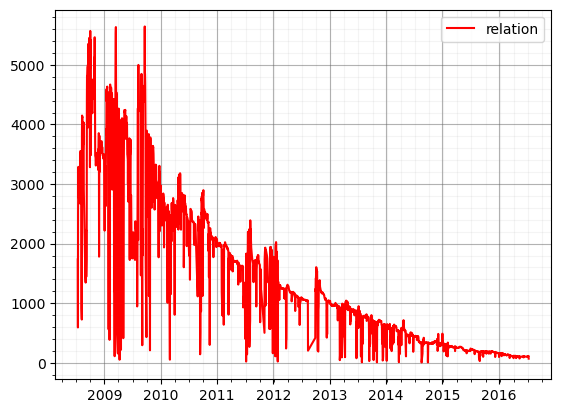

In [25]:
# plotting the data 
plt.plot(df["DATEPRD"],df["BORE_OIL_VOL"],label="relation",color="red")
# xlabel 

plt.legend(loc="upper right") 
# major grid lines
plt.grid(which="major",color="#6666",linestyle="-",alpha=.5)
# minor grid lines
plt.grid(which="minor",color="#9999",linestyle="-",alpha=.1)
# show the minor grid lines
plt.minorticks_on()


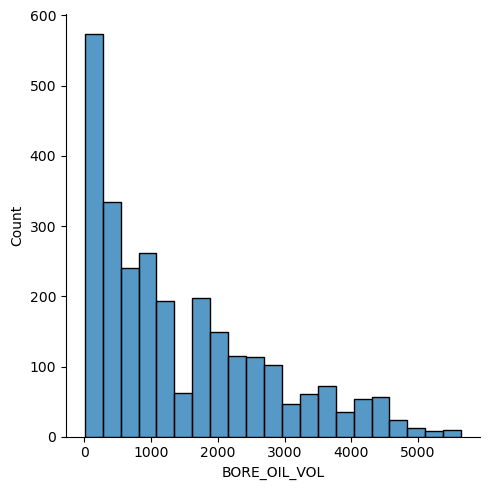

In [26]:
# show the distribution to clear the output , displot
sns.displot(df["BORE_OIL_VOL"])


In [30]:
# apply moving average
df["oil_smoothed"] = df["BORE_OIL_VOL"].rolling(window=150, center=True).mean()

In [31]:
df["oil_smoothed"].isna().sum()

149

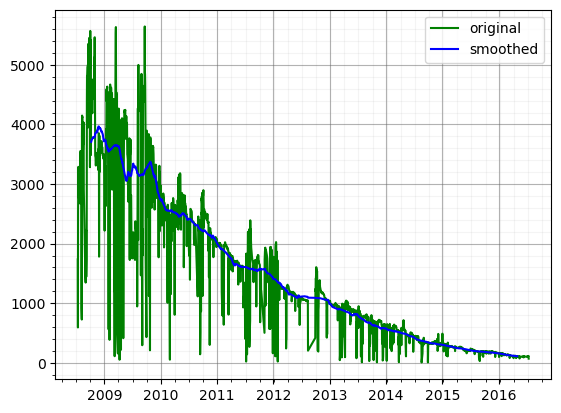

In [32]:
# show effect of smoothing
# plotting the data 
plt.plot(df["DATEPRD"],df["BORE_OIL_VOL"],label="original",color="green")
plt.plot(df["DATEPRD"],df["oil_smoothed"],label="smoothed",color="blue")
plt.legend() 
# major grid lines
plt.grid(which="major",color="#6666",linestyle="-",alpha=.5)
# minor grid lines
plt.grid(which="minor",color="#9999",linestyle="-",alpha=.1)
# show the minor grid lines
plt.minorticks_on()

## <span style="font-weight:900;font-color:#333"> Date column

In [39]:
# select the columns
(df["DATEPRD"].max() - df["DATEPRD"].min() ).days
# refrenece 

2922

In [41]:
# get days from the date
df["days"] = (df["DATEPRD"] - df["DATEPRD"].min()).dt.days

In [42]:
df["days"]

5118       0
5119       1
5120       2
5121       3
5122       4
        ... 
7952    2918
7953    2919
7954    2920
7955    2921
7956    2922
Name: days, Length: 2723, dtype: int64

In [46]:
df = df[["oil_smoothed", "days"]].dropna()

In [47]:
# get T and Q 
T = df["days"]
Q = df["oil_smoothed"]

In [48]:
# normalize the time and rate data
T_normalized = T / max(T)
Q_normalized = Q / max(Q)

In [50]:
def hyperbolic(t, qi, di, b):
      return qi / (np.abs((1 + b * di * t))**(1/b))

In [51]:
from scipy.optimize import curve_fit

In [58]:
 # fitting the data with the hyperbolic function
params , _ = curve_fit(hyperbolic , T , Q)

qi,di, b = params

In [59]:
qi,di, b

(4259.776443779293, 0.000731811176272774, -0.3400568358007921)

In [61]:
# show the fitted model
q_hp = hyperbolic(T,qi,di, b)
q_hp

5204    3994.225830
5205    3991.238863
5206    3988.253370
5207    3985.269352
5208    3982.286807
           ...     
7878     114.376640
7879     114.090470
7880     113.804774
7881     113.519549
7882     113.234797
Name: days, Length: 2574, dtype: float64

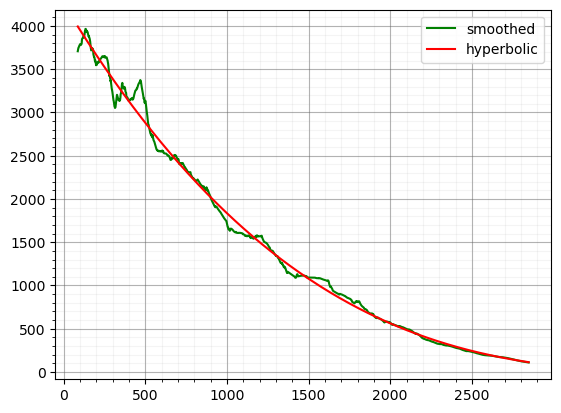

In [64]:
# show effect of smoothing
# plotting the data 
plt.plot(T,Q,label="smoothed",color="green")
plt.plot(T,q_hp,label="hyperbolic",color="red")

plt.legend() 
# major grid lines
plt.grid(which="major",color="#6666",linestyle="-",alpha=.5)
# minor grid lines
plt.grid(which="minor",color="#9999",linestyle="-",alpha=.1)
# show the minor grid lines
plt.minorticks_on()

## <span style="font-weight:900;font-color:#333"> Using ready module

In [40]:
from dca_oop import ARPS

In [41]:
df_well_1 = df[ df["NPD_WELL_BORE_NAME"]=="15/9-F-14"]

In [56]:
arps = ARPS(df_well_1,"BORE_GAS_VOL","DATEPRD") 

In [57]:
# smoothing the data 
df_smoothed = arps.smooth(150,3,True)

D:\college\student chapter\SPE\Technical manager\python for O&G course\DCA module\dca_oop.py:91: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df[self.q + '_rol_Av'] = self.df[self.q].rolling(window=window_size, center=True).mean()
D:\college\student chapter\SPE\Technical manager\python for O&G course\DCA module\dca_oop.py:93: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df[self.q + '_rol_Std'] = self.df[self.q].rolling(window=window_size, center=True).std()
D:\college\student chapter\SPE\Technic

In [58]:
df_smoothed

,DATEPRD,BORE_GAS_VOL,BORE_GAS_VOL_rol_Av,BORE_GAS_VOL_rol_Std,BORE_GAS_VOL_is_Outlier
0,2009-02-08,664681.95,509574.003400,156758.623688,False
1,2009-02-09,531370.47,509739.961600,156789.001924,False
2,2009-02-10,659900.98,509715.732667,156782.423565,False
3,2009-02-11,629307.34,509709.818533,156780.783212,False
4,2009-02-12,631954.75,508421.374600,159739.572637,False
...,...,...,...,...,...
2395,2016-04-26,15009.64,17787.457733,2256.864943,False
2396,2016-04-27,14879.97,17763.153733,2226.295909,False
2397,2016-04-28,14692.89,17742.551000,2209.729075,False
2398,2016-04-29,15863.53,17729.325067,2198.857858,False


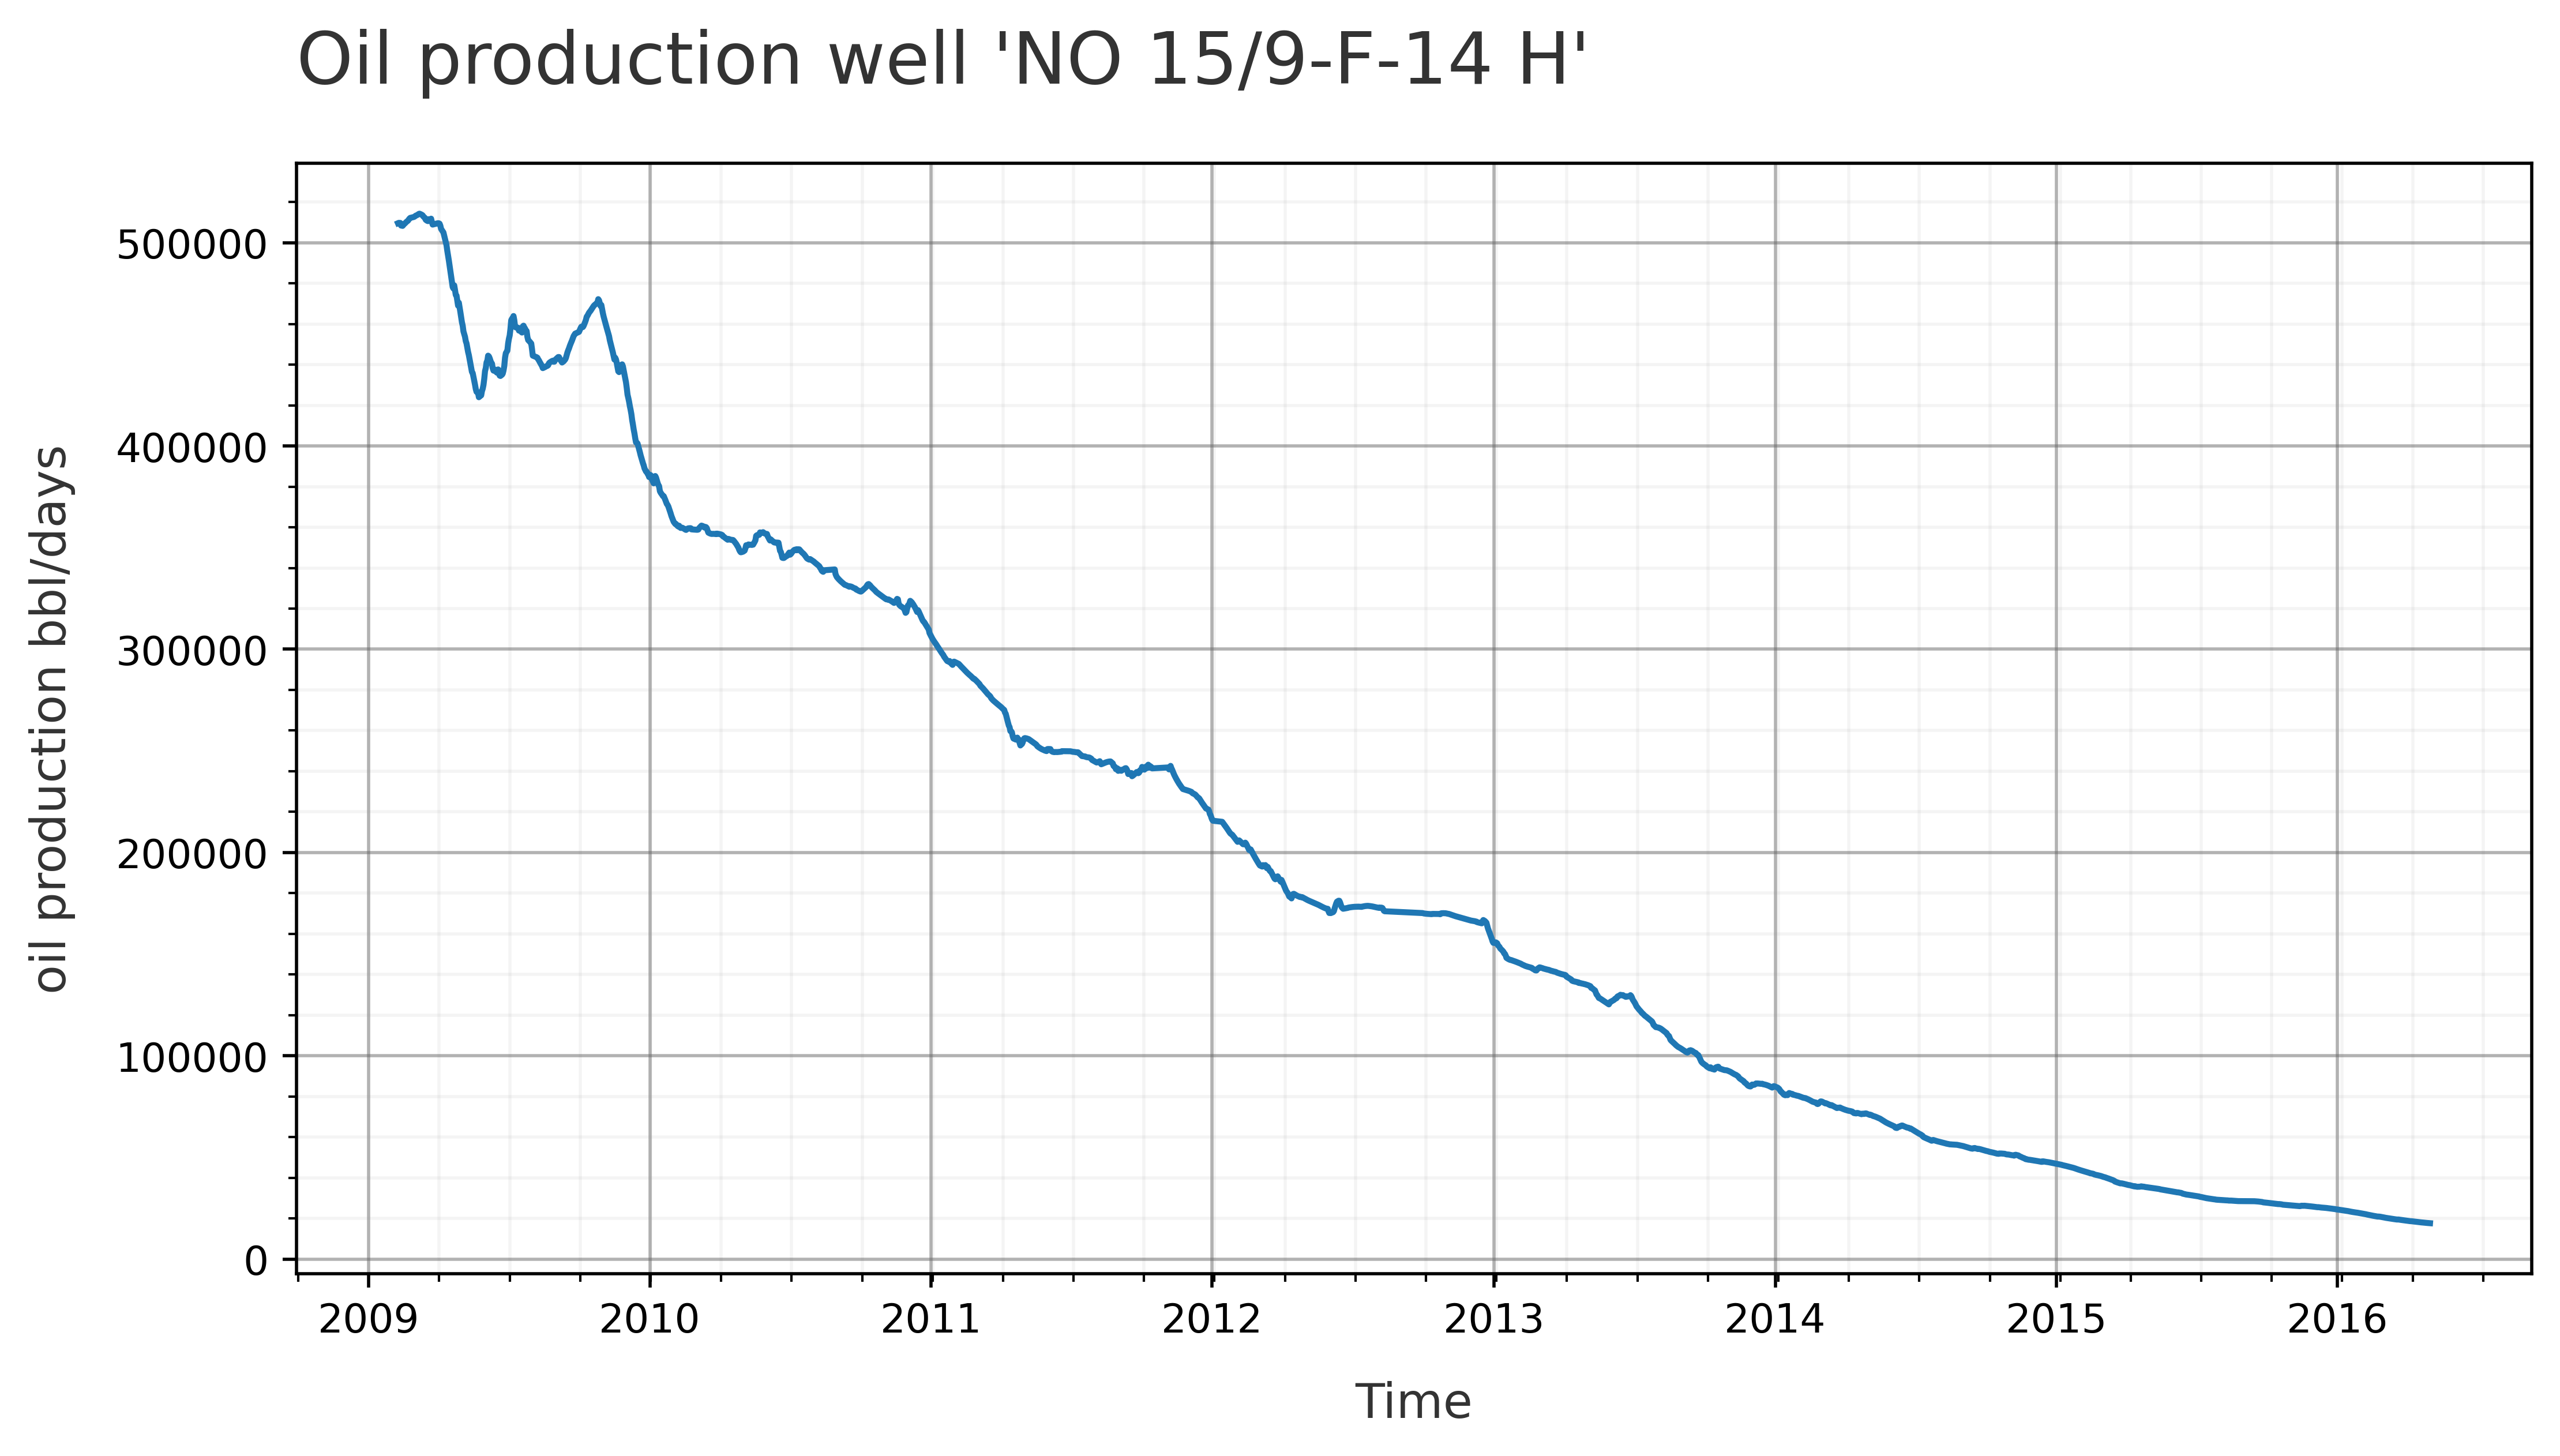

In [62]:
plt.figure(figsize=(10,5),dpi=500)
plt.plot(df_smoothed["DATEPRD"],df_smoothed["BORE_GAS_VOL_rol_Av"])
# figure title 
plt.title("Oil production well 'NO 15/9-F-14 H' ",fontsize=18,color="#333",loc="left",pad=20)
# xlabel 
plt.xlabel("Time",labelpad=10,loc="center",fontsize=12,color="#333")
# ylabel
plt.ylabel("oil production bbl/days",labelpad=10,loc="center",color="#333",fontsize=12)
plt.grid(which="major",color="#6666",linestyle="-",alpha=.5)
# minor grid lines
plt.grid(which="minor",color="#9999",linestyle="-",alpha=.1)
# show the minor grid lines
plt.minorticks_on()

In [63]:
# process the date column
arps.prepocess_date_col()

In [64]:
# apply the parameter
params, Qs = arps.fit_hyperbolic()

In [65]:
Qs 

0       504044.966614
1       503707.678352
2       503370.512621
3       503033.469413
4       502696.548721
            ...      
2395     13942.762350
2396     13894.673426
2397     13846.674660
2398     13798.766026
2399     13750.947497
Name: Time [{frequency}], Length: 2400, dtype: float64

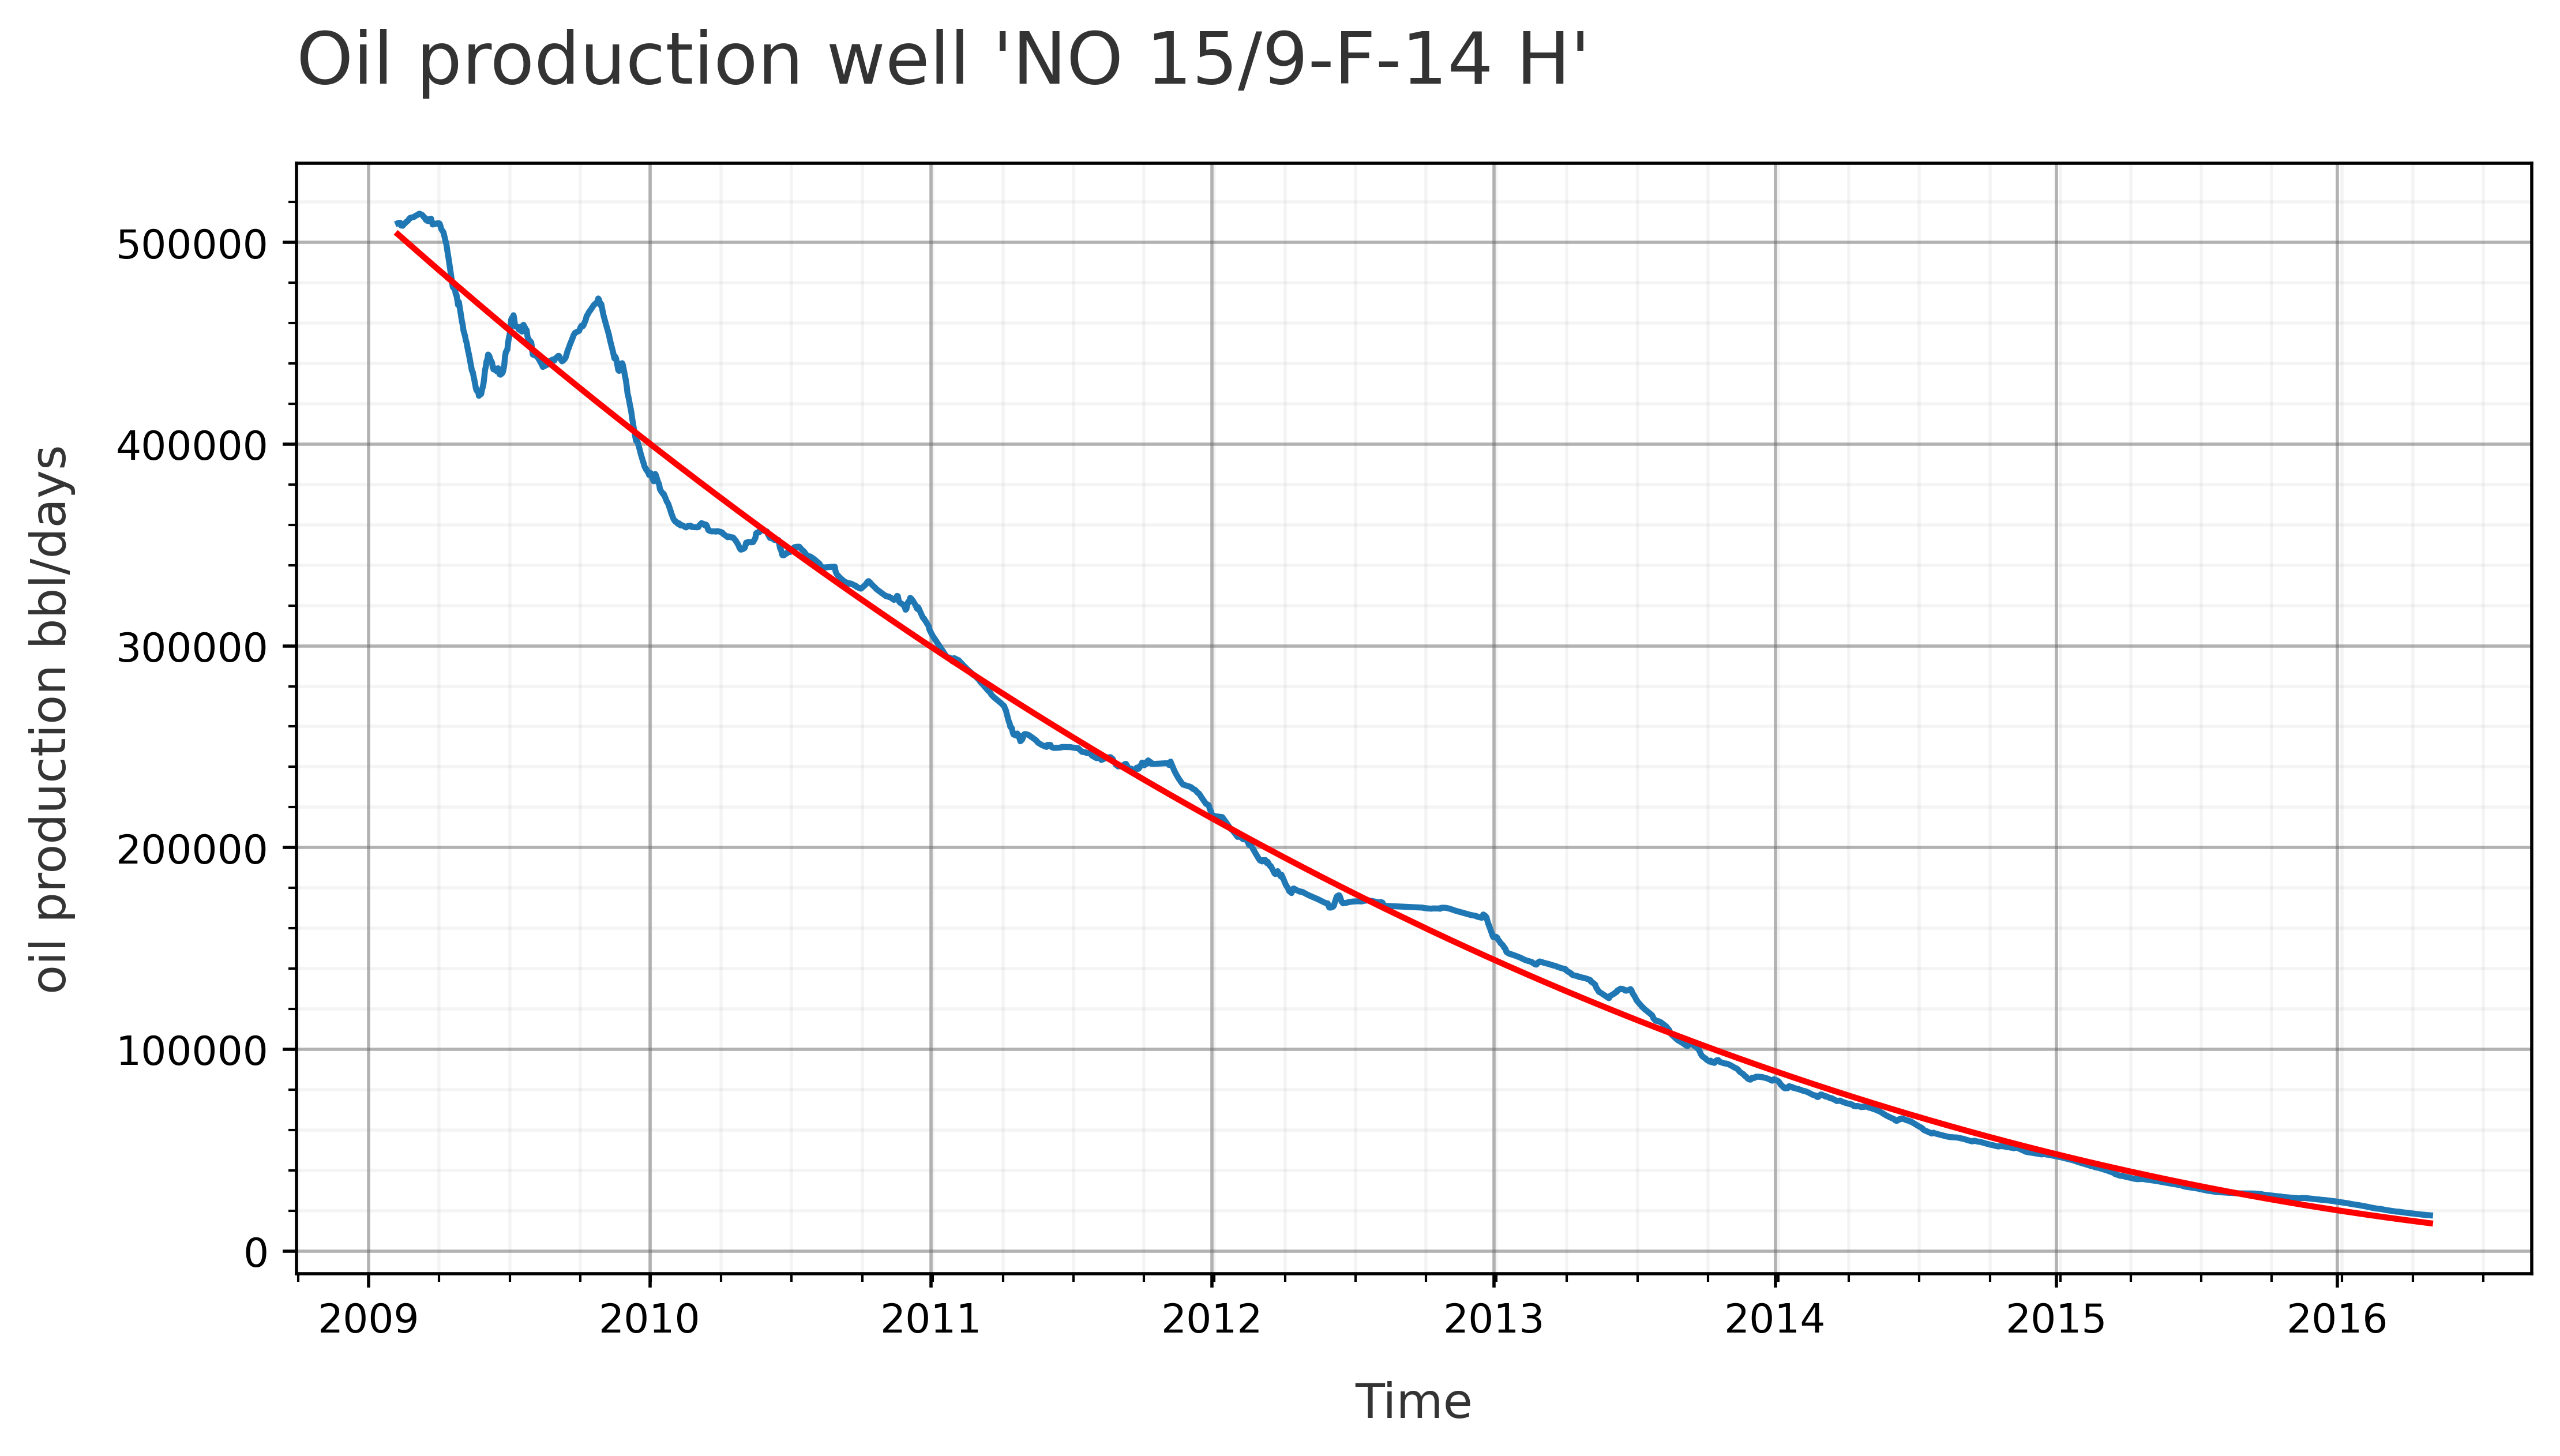

In [66]:
plt.figure(figsize=(10,5),dpi=500)
plt.plot(df_smoothed["DATEPRD"],df_smoothed["BORE_GAS_VOL_rol_Av"])
plt.plot(df_smoothed["DATEPRD"],Qs,color="red")
# figure title 
plt.title("Oil production well 'NO 15/9-F-14 H' ",fontsize=18,color="#333",loc="left",pad=20)
# xlabel 
plt.xlabel("Time",labelpad=10,loc="center",fontsize=12,color="#333")
# ylabel
plt.ylabel("oil production bbl/days",labelpad=10,loc="center",color="#333",fontsize=12)
plt.grid(which="major",color="#6666",linestyle="-",alpha=.5)
# minor grid lines
plt.grid(which="minor",color="#9999",linestyle="-",alpha=.1)
# show the minor grid lines
plt.minorticks_on()

In [67]:
qi ,di ,b, rmse_normalized , model = params
print(f"qI = {qi} stb/day")
print(f"di = {di} 1/day")
print(f"b = {b} ")
print(f"RMSE = {rmse_normalized}")

qI = 504044.9666142172 stb/day
di = 0.0006692845917730972 1/day
b = -0.4572768469420516 
RMSE = 0.002885557322889495
